IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

EDA

In [2]:
Salary=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Naive%20bays/SalaryData_Train.csv')
Salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
Salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
Salary.shape

(30161, 14)

In [5]:
Salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
Salary.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
Salary.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

DATA CLEANING

In [8]:
Salary[Salary.duplicated()].shape

(3258, 14)

In [9]:
Salary[Salary.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [10]:
Salary_data=Salary.drop_duplicates()
Salary_data.shape

(26903, 14)

In [11]:
Salary_data['workclass'].value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [12]:
Salary_data['workclass'].describe()

count        26903
unique           7
top        Private
freq         19213
Name: workclass, dtype: object

In [13]:
Salary_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


In [14]:
Salary.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [15]:
Salary_data['workclass']=Salary_data['workclass'].astype('category')
Salary_data['education']=Salary_data['education'].astype('category')
Salary_data['maritalstatus']=Salary_data['maritalstatus'].astype('category')
Salary_data['occupation']=Salary_data['occupation'].astype('category')
Salary_data['relationship']=Salary_data['relationship'].astype('category')
Salary_data['race']=Salary_data['race'].astype('category')
Salary_data['sex']=Salary_data['sex'].astype('category')
Salary_data['native']=Salary_data['native'].astype('category')

`PRE-PROCESSING DATA

In [16]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()

In [17]:
Salary_data['Salary']=label_encoder.fit_transform(Salary_data['Salary'])
Salary_data['workclass']=label_encoder.fit_transform(Salary_data['workclass'])
Salary_data['education']=label_encoder.fit_transform(Salary_data['education'])
Salary_data['maritalstatus']=label_encoder.fit_transform(Salary_data['maritalstatus'])
Salary_data['occupation']=label_encoder.fit_transform(Salary_data['occupation'])
Salary_data['relationship']=label_encoder.fit_transform(Salary_data['relationship'])
Salary_data['race']=label_encoder.fit_transform(Salary_data['race'])
Salary_data['sex']=label_encoder.fit_transform(Salary_data['sex'])
Salary_data['native']=label_encoder.fit_transform(Salary_data['native'])

VISUALISATIONS

<Axes: >

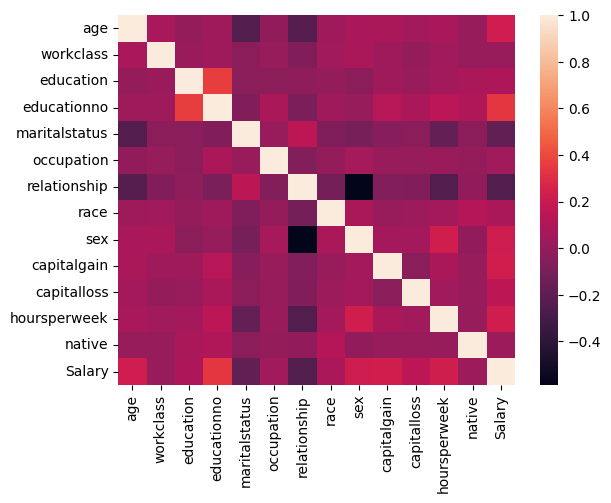

In [18]:
sns.heatmap(Salary_data.corr())

SPLITTING DATA

In [21]:
X = Salary_data.drop(['Salary'], axis=1)
y = Salary_data['Salary']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

MODEL BUILDING

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

PREDICTIONS

In [25]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

CHECKING ACCURACY SCORE

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8034


COMPARING TRAINING AND TESTIG ACCURACY

In [31]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7918


CHECKING FOR OVERFITTING

In [33]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7918
Test set score: 0.8034
